<a href="https://colab.research.google.com/github/xyaoaf/UrbanTreeStudywithLidar/blob/main/230318_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

In [70]:
df = pd.read_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/230318_Prediction.csv')
# export the dataframe to a CSV file

In [71]:
df

treeID     min_x      min_y     max_x      max_y    abv    all  min  \
0       10003 527030.45 5043911.64 527034.10 5043912.86     46    100 2.68   
1       10004 527245.03 5043901.88 527259.66 5043916.21   8679  11003 1.37   
2       10005 527344.70 5043902.50 527362.07 5043917.74   8936  10874 1.44   
3       10006 527421.81 5043897.01 527442.54 5043917.74  12173  13477 1.38   
4       10007 527151.76 5043901.58 527167.30 5043914.69   4660   5729 1.38   
...       ...       ...        ...       ...        ...    ...    ...  ...   
12907   27621 538367.08 5039095.60 538371.66 5039103.22    513    917 1.42   
12908   27623 538339.96 5039094.69 538346.36 5039100.17    308    862 1.48   
12909   27625 538308.26 5039093.77 538311.61 5039097.12    137    389 2.09   
12910   27627 538247.30 5039092.86 538252.48 5039096.21    322    654 1.47   
12911   27628 538277.47 5039093.16 538284.79 5039097.12    538   1068 1.37   

        max   avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  \
0      2.91  2.87   8.23 0.04 -2.96 12.22 2.68 2.85  2.86  2.88  2.89  2.90   
1     14.93  7.99  72.76 2.98 -0.23  2.19 1.37 3.69  5.82  8.25 10.30 11.78   
2     16.93  8.16  78.78 3.48  0.25  2.26 1.44 3.47  5.50  8.00 10.26 13.43   
3     20.67 14.60 230.76 4.20 -0.84  2.66 1.38 8.02 11.57 15.86 17.97 18.96   
4     11.57  7.80  64.71 1.97 -0.93  3.61 1.38 5.22  6.57  8.28  9.28  9.92   
...     ...   ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...   
12907 22.70  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50   
12908 21.27  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50   
12909 20.93  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60   
12910 19.59  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53   
12911 22.48 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07   

       b10  b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  \
0     0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52   
1     0.04 0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17   
2     0.05 0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15   
3     0.01 0.02 0.07 0.15 0.24 0.30 0.40 0.60 0.87 0.01 0.07 0.28     0.02   
4     0.02 0.04 0.06 0.11 0.24 0.38 0.55 0.81 0.98 0.06 0.29 0.45     0.15   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
12907 0.31 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15     0.40   
12908 0.10 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57   
12909 0.20 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61   
12910 0.38 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41   
12911 0.28 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47   

       dns_gap  height  crownArea   SArea  Min_Slope  Max_Slope  Avg_Slope  \
0         0.54    2.41       2.60   15.54       0.45    5698.07     875.34   
1         0.21   11.35     139.17 1273.63       0.00   10000.00    1671.15   
2         0.18   14.41     168.25 1121.49       0.00   10000.00    1244.77   
3         0.10   19.27     297.94 1331.66       0.14   10000.00    1511.67   
4         0.19    9.69      97.46  700.19       0.00   10000.00    1402.57   
...        ...     ...        ...     ...        ...        ...        ...   
12907     0.44    7.66      13.56  246.34       0.07   10000.00    3906.60   
12908     0.64    5.93      16.17  277.07       0.12   10000.00    3781.20   
12909     0.65    4.13       6.22   91.12       0.20    8227.38    2632.09   
12910     0.51    6.09       9.94  190.38       0.00    6532.73    3023.02   
12911     0.50    7.77      15.14  334.22       0.00   10000.00    3937.76   

       Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                    1.36   55.82   88.93   61.68  221.14  111.17  122.33   
1                    6.61   61.62   79.08   64.92  202.11   56.24   89.45   
2               

# EDA

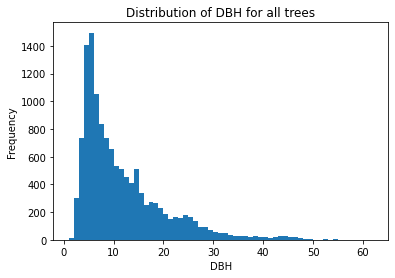

In [72]:
# round the values in the column to the nearest integer
df['DBH'] = df['DBH'].round()

# calculate the minimum and maximum values of the column
min_value = int(df['DBH'].min())
max_value = int(df['DBH'].max())

# create bins with a width of 1
bins = range(min_value, max_value + 2, 1)

# plot the histogram
plt.hist(df['DBH'], bins=bins)

# set the title and labels for the plot
plt.title('Distribution of DBH for all trees')
plt.xlabel('DBH')
plt.ylabel('Frequency')

# show the plot
plt.show()

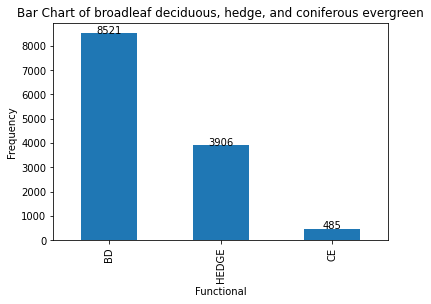

In [73]:
# count the frequency of each category in the column
category_counts = df['Functional'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of broadleaf deciduous, hedge, and coniferous evergreen')
plt.xlabel('Functional')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

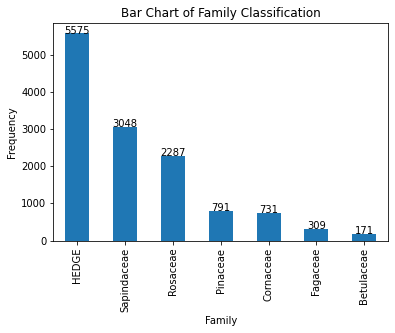

In [74]:
# count the frequency of each category in the column
category_counts = df['Family'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of Family Classification')
plt.xlabel('Family')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

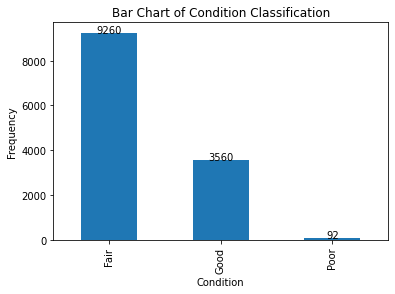

In [75]:
# count the frequency of each category in the column
category_counts = df['Condition'].value_counts()

# create a bar chart of the category counts
category_counts.plot.bar()

# create a bar chart of the category counts
ax = category_counts.plot.bar()

# set the title and labels for the plot
plt.title('Bar Chart of Condition Classification')
plt.xlabel('Condition')
plt.ylabel('Frequency')

# add text labels for the counts on each bar
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center')

# show the plot
plt.show()

# Plotting

In [76]:
# import matplotlib.pyplot as plt
# # Filter the dataframe based on treeID
# dfW = df[df['treeID'] < 20000]
# # Set the figure size
# plt.figure(figsize=(8,8))
# # Plot the points on a scatter plot
# plt.scatter(dfW['min_x'], dfW['min_y'], s=0)
# # Plot the rectangles
# for index, row in dfW.iterrows():
#     rect = plt.Rectangle((row['min_x'], row['min_y']), row['max_x']-row['min_x'], row['max_y']-row['min_y'], fill=None, alpha=1, edgecolor='r')
#     plt.gca().add_patch(rect)
# # Add axis labels and a title
# plt.xlabel('X Axis')
# plt.ylabel('Y Axis')
# plt.title('Scatter plot of points with rectangles')
# # Set the aspect ratio to equal
# plt.gca().set_aspect('equal', adjustable='box')
# # Show the plot
# plt.show()

In [77]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse
# # Filter the dataframe based on treeID
# dfW = df[df['treeID'] < 20000]
# # Set the figure size
# plt.figure(figsize=(8,8))
# # Plot the points on a scatter plot
# plt.scatter(dfW['min_x'], dfW['min_y'], s=0)
# # Plot the ellipsoids
# for index, row in dfW.iterrows():
#     center_x = (row['max_x'] + row['min_x']) / 2
#     center_y = (row['max_y'] + row['min_y']) / 2
#     width = row['max_x'] - row['min_x']
#     height = row['max_y'] - row['min_y']
#     ellipse = Ellipse(xy=(center_x, center_y), width=width, height=height, fill=None, alpha=1, edgecolor='r')
#     plt.gca().add_patch(ellipse)
# # Add axis labels and a title
# plt.xlabel('X Axis')
# plt.ylabel('Y Axis')
# plt.title('Scatter plot of points with ellipsoids')
# # Set the aspect ratio to equal
# plt.gca().set_aspect('equal', adjustable='box')
# # Show the plot
# plt.show()

<ipython-input-78-d9a87fd1d020>:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


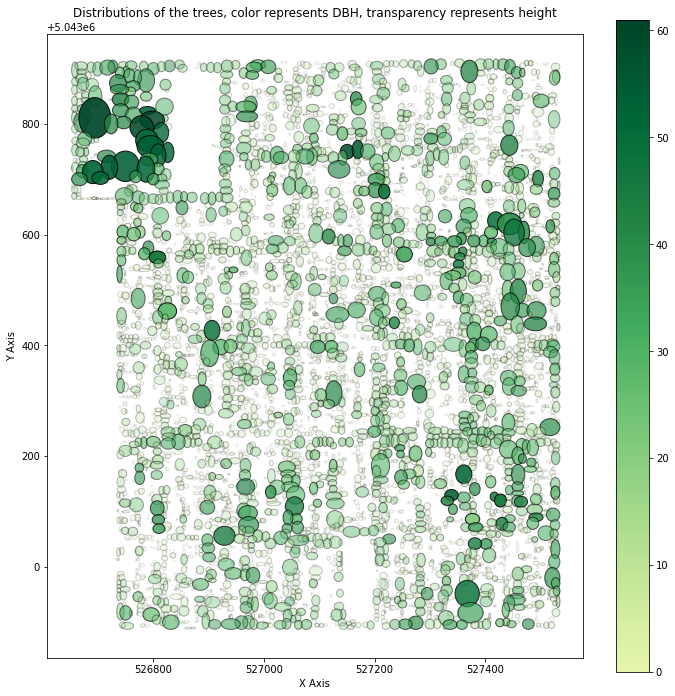

In [78]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap that goes from light green to dark green using the "gist_earth_r" colormap
cmap = LinearSegmentedColormap.from_list('Custom', plt.cm.YlGn(np.linspace(0.2, 1, 256)), N=256)

# Filter the dataframe based on treeID
dfW = df[df['treeID'] < 20000]

# Set the figure size
plt.figure(figsize=(12,12))

# Plot the points on a scatter plot
plt.scatter(dfW['min_x'], dfW['min_y'], s=0)

# Plot the ellipsoids
for index, row in dfW.iterrows():
    color = cmap(row['DBH'] / dfW['DBH'].max())  # Color based on value in column 10
    alpha = (row['height'] / dfW['height'].max())  # Alpha based on value in another column
    ell = Ellipse(xy=(row['min_x']+(row['max_x']-row['min_x'])/2, row['min_y']+(row['max_y']-row['min_y'])/2), width=row['max_x']-row['min_x'], height=row['max_y']-row['min_y'], angle=0, alpha=alpha)
    ell.set_facecolor(color)
    ell.set_edgecolor('black')
    plt.gca().add_artist(ell)

# Add axis labels and a title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Distributions of the trees, color represents DBH, transparency represents height')

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=dfW["DBH"].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()


<ipython-input-79-85114ce91c39>:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


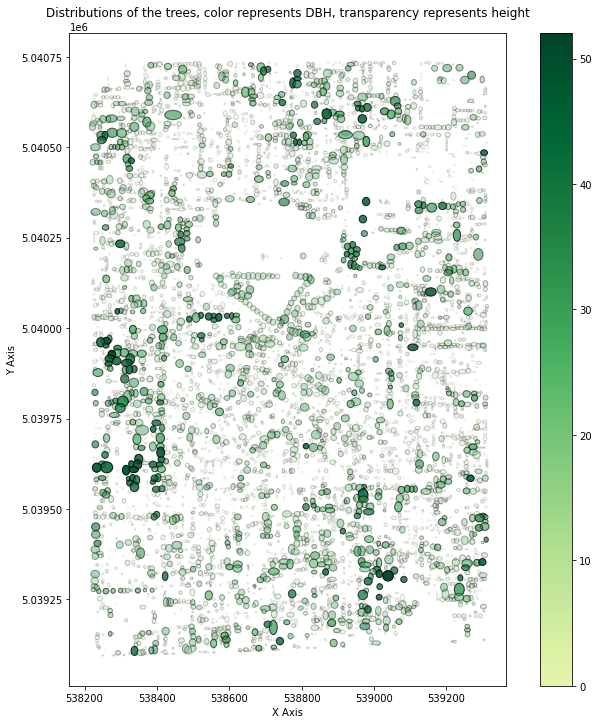

In [79]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap that goes from light green to dark green using the "gist_earth_r" colormap
cmap = LinearSegmentedColormap.from_list('Custom', plt.cm.YlGn(np.linspace(0.2, 1, 256)), N=256)

# Filter the dataframe based on treeID
dfW = df[df['treeID'] > 20000]

# Set the figure size
plt.figure(figsize=(12,12))

# Plot the points on a scatter plot
plt.scatter(dfW['min_x'], dfW['min_y'], s=0)

# Plot the ellipsoids
for index, row in dfW.iterrows():
    color = cmap(row['DBH'] / dfW['DBH'].max())  # Color based on value in column 10
    alpha = (row['height'] / dfW['height'].max())  # Alpha based on value in another column
    ell = Ellipse(xy=(row['min_x']+(row['max_x']-row['min_x'])/2, row['min_y']+(row['max_y']-row['min_y'])/2), width=row['max_x']-row['min_x'], height=row['max_y']-row['min_y'], angle=0, alpha=alpha)
    ell.set_facecolor(color)
    ell.set_edgecolor('black')
    plt.gca().add_artist(ell)

# Add axis labels and a title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Distributions of the trees, color represents DBH, transparency represents height')

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=dfW["DBH"].max()))
sm._A = []
cbar = plt.colorbar(sm)

# Show the plot
plt.show()


<ipython-input-89-011210cb393a>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-89-011210cb393a>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


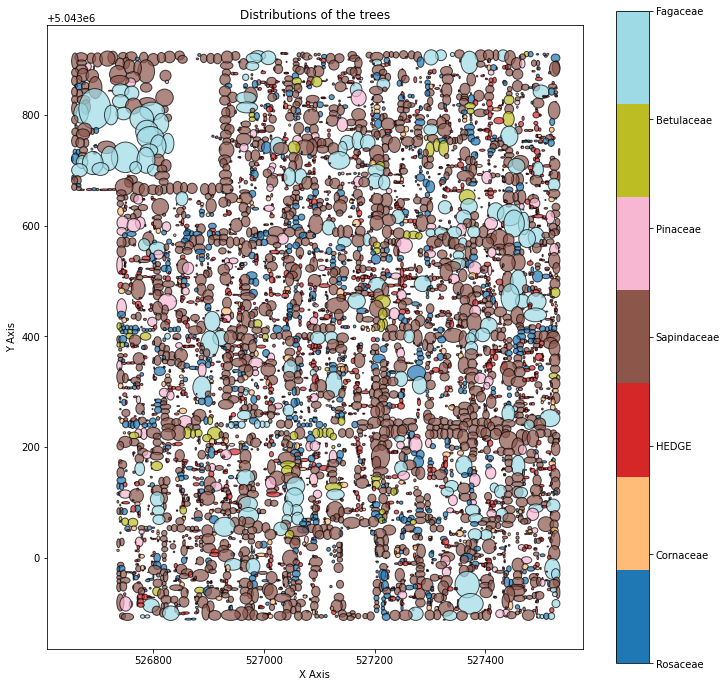

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap

# Get the unique categories in the 'Family' column
categories = dfW['Family'].unique()

# Define a colormap with a unique color for each category
num_categories = len(categories)
cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, num_categories)))

# Create a dictionary that maps the category index to its corresponding name in the 'Family' column
category_names = {i: name for i, name in enumerate(categories)}

# Filter the dataframe based on treeID
dfW = df[df['treeID'] < 20000]

# Set the figure size
plt.figure(figsize=(12,12))

# Plot the points on a scatter plot
plt.scatter(dfW['min_x'], dfW['min_y'], s=0)

# Plot the ellipsoids
for index, row in dfW.iterrows():
    category_index = np.where(categories == row['Family'])[0][0]  # Get the index of the category in the colormap
    alpha = (row['height'] / dfW['height'].max())  # Alpha based on value in another column
    ell = Ellipse(xy=(row['min_x']+(row['max_x']-row['min_x'])/2, row['min_y']+(row['max_y']-row['min_y'])/2), width=row['max_x']-row['min_x'], height=row['max_y']-row['min_y'], angle=0, alpha=0.7)
    ell.set_facecolor(cmap(category_index))
    ell.set_edgecolor('black')
    plt.gca().add_artist(ell)

# Add axis labels and a title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Distributions of the trees')

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=num_categories-1))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_ticklabels([category_names[i] for i in range(num_categories)])

# Show the plot
plt.show()

<ipython-input-90-7b4cf278f96c>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-90-7b4cf278f96c>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


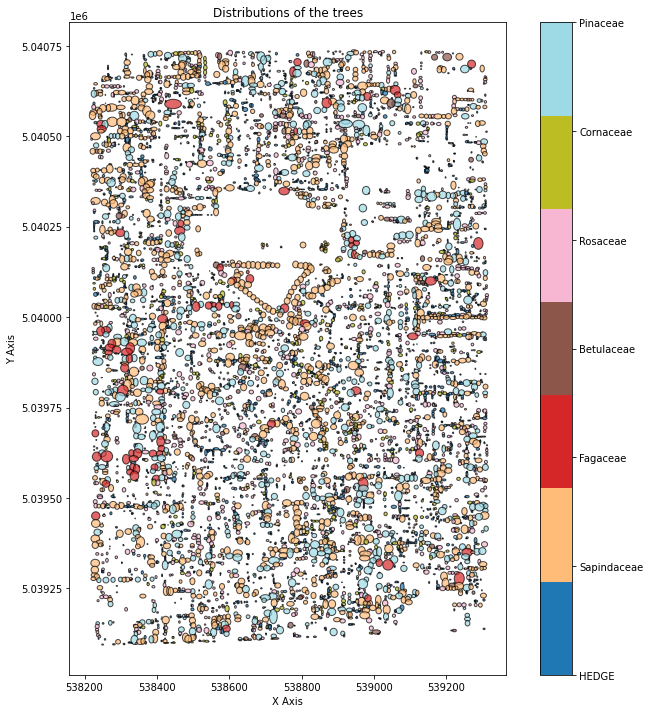

In [90]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap

# Get the unique categories in the 'Family' column
categories = dfW['Family'].unique()

# Define a colormap with a unique color for each category
num_categories = len(categories)
cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, num_categories)))

# Create a dictionary that maps the category index to its corresponding name in the 'Family' column
category_names = {i: name for i, name in enumerate(categories)}

# Filter the dataframe based on treeID
dfW = df[df['treeID'] > 20000]

# Set the figure size
plt.figure(figsize=(12,12))

# Plot the points on a scatter plot
plt.scatter(dfW['min_x'], dfW['min_y'], s=0)

# Plot the ellipsoids
for index, row in dfW.iterrows():
    category_index = np.where(categories == row['Family'])[0][0]  # Get the index of the category in the colormap
    alpha = (row['height'] / dfW['height'].max())  # Alpha based on value in another column
    ell = Ellipse(xy=(row['min_x']+(row['max_x']-row['min_x'])/2, row['min_y']+(row['max_y']-row['min_y'])/2), width=row['max_x']-row['min_x'], height=row['max_y']-row['min_y'], angle=0, alpha=0.7)
    ell.set_facecolor(cmap(category_index))
    ell.set_edgecolor('black')
    plt.gca().add_artist(ell)

# Add axis labels and a title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Distributions of the trees')

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=num_categories-1))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_ticklabels([category_names[i] for i in range(num_categories)])

# Show the plot
plt.show()


In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap

def plot_tree_distributions(df, category, treeID_range):
    # Get the unique categories in the specified column
    categories = df[category].unique()

    # Define a colormap with a unique color for each category
    num_categories = len(categories)
    cmap = ListedColormap(plt.cm.tab20(np.linspace(0, 1, num_categories)))

    # Create a dictionary that maps the category index to its corresponding name in the specified column
    category_names = {i: name for i, name in enumerate(categories)}

    # Filter the dataframe based on the specified treeID range
    df = df[(df['treeID'] >= treeID_range[0]) & (df['treeID'] < treeID_range[1])]

    # Set the figure size
    plt.figure(figsize=(6,6))

    # Plot the points on a scatter plot
    plt.scatter(df['min_x'], df['min_y'], s=0)

    # Plot the ellipsoids
    for index, row in df.iterrows():
        category_index = np.where(categories == row[category])[0][0]  # Get the index of the category in the colormap
        alpha = (row['height'] / df['height'].max())  # Alpha based on value in another column
        ell = Ellipse(xy=(row['min_x']+(row['max_x']-row['min_x'])/2, row['min_y']+(row['max_y']-row['min_y'])/2), width=row['max_x']-row['min_x'], height=row['max_y']-row['min_y'], angle=0, alpha=0.7)
        ell.set_facecolor(cmap(category_index))
        ell.set_edgecolor('black')
        plt.gca().add_artist(ell)

    # Add axis labels and a title
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Distributions of the trees')

    # Set the aspect ratio to equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Set the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=num_categories-1))
    sm._A = []
    cbar = plt.colorbar(sm)
    cbar.set_ticklabels([category_names[i] for i in range(num_categories)])

    # Show the plot
    plt.show()


<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


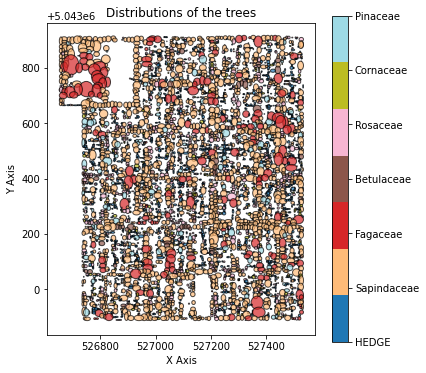

In [83]:
plot_tree_distributions(df, "Family", [0,20000])

<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


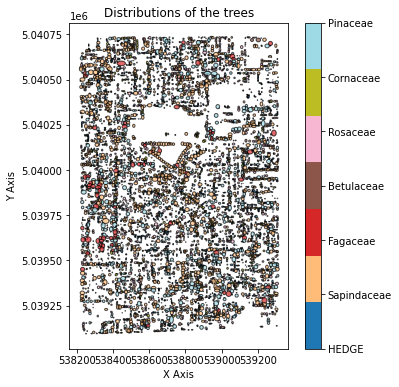

In [84]:
plot_tree_distributions(df, "Family", [20000,30000])

<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


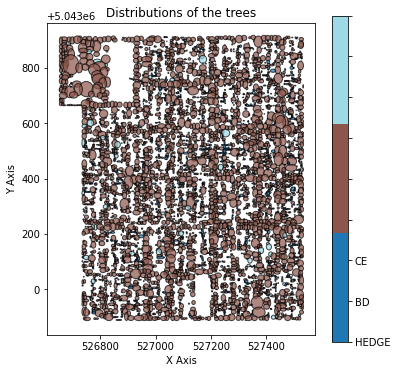

In [85]:
plot_tree_distributions(df, "Functional", [0,20000])

<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


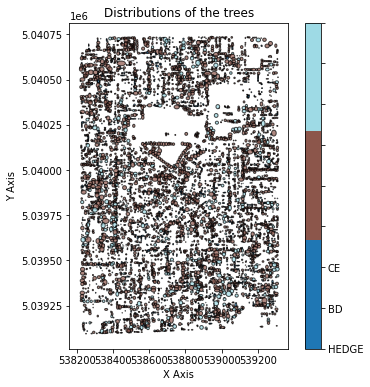

In [86]:
plot_tree_distributions(df, "Functional", [20000,30000])

<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


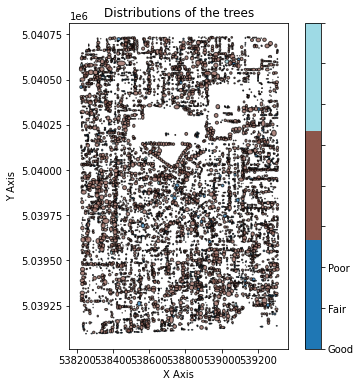

In [87]:
plot_tree_distributions(df, "Condition", [20000,30000])

<ipython-input-82-fce64638d895>:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
<ipython-input-82-fce64638d895>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels([category_names[i] for i in range(num_categories)])


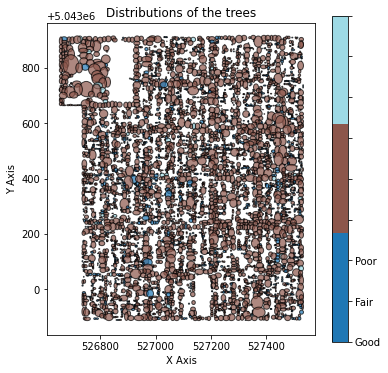

In [88]:
plot_tree_distributions(df, "Condition", [0,20000])

# Clustering

In [239]:
dfHEDGE = df.loc[df['Family'] == 'HEDGE']
dfnonHEDGE = subset = df.loc[df['Family'] != 'HEDGE']

# Select the columns you want to use for clustering
subset = dfnonHEDGE[['height', 'crownArea', 'DBH']]

# Create a scaler object and fit it to the data
scaler = RobustScaler()
scaler.fit(subset)

# Transform the data using the scaler object
normalized_data = scaler.transform(subset)

# Increase the weight of the 'height' column by multiplying it by a factor
normalized_data[:,0] *= 2

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3).fit(normalized_data)

# Add a new column to the original dataframe with the cluster labels
dfnonHEDGE['Cluster'] = kmeans.labels_
dfHEDGE['Cluster'] = 4

# Merge the two dataframes together
merged_df = pd.merge(dfHEDGE, dfnonHEDGE, how='outer')

# Sort the merged dataframe by values in the 'height' column
df = merged_df.sort_values('treeID')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-239-23c298485401>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-239-23c298485401>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [241]:
df['Cluster'] = df['Cluster'].replace({0:1, 1:3, 2:2, 4:0})

In [242]:
# Filter out the extreme value outliers
df1 = df[(df['DBH'] >= df['DBH'].quantile(0.01)) & (df['DBH'] <= df['DBH'].quantile(0.99))]
df1 = df1[(df1['crownArea'] >= df1['crownArea'].quantile(0.01)) & (df1['crownArea'] <= df1['crownArea'].quantile(0.99))]
df1 = df1[(df1['height'] >= df1['height'].quantile(0.01)) & (df1['height'] <= df1['height'].quantile(0.99))]

# Create an interactive 3D scatter plot with the cluster labels represented by color
fig = px.scatter_3d(df1, x='DBH', y='crownArea', z='height', color='Cluster',
                     color_discrete_sequence=['00FF00', 'FF0000', '0000FF'])
fig.show()

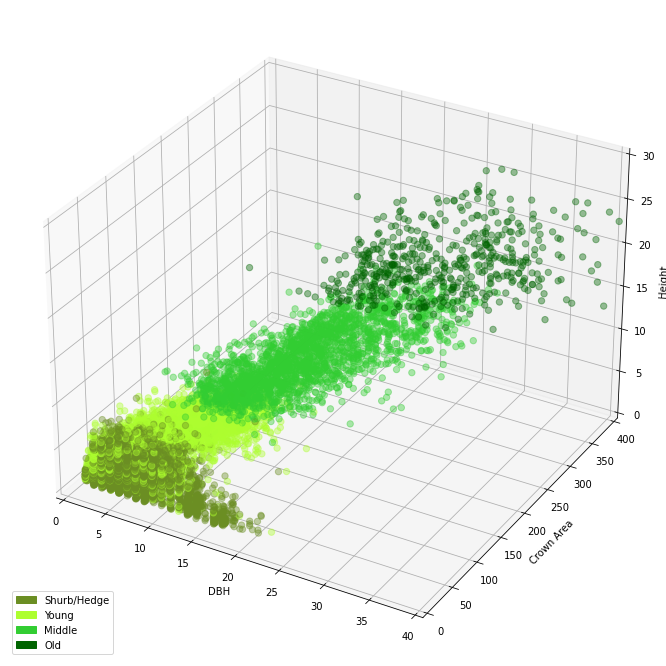

In [257]:


# Define the colormap for the clusters
cluster_colors = ListedColormap(['olivedrab', 'greenyellow', 'limegreen', 'darkgreen'])



# Define the mapping from cluster labels to names
cluster_names = {0: 'Shurb/Hedge', 1: 'Young', 2: 'Middle', 3: 'Old'}

# Create a 3D scatter plot with the cluster labels represented by color
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df1['DBH'], df1['crownArea'], df1['height'], c=df1['Cluster'], s=40, alpha=0.4, cmap=cluster_colors)

# Add axis labels
ax.set_xlabel('DBH')
ax.set_ylabel('Crown Area')
ax.set_zlabel('Height')

# Create custom legend handles and labels
handles = []
labels = []
for i in range(4):
    handles.append(mpatches.Patch(color=cluster_colors(i), label=cluster_names[i]))
    labels.append(cluster_names[i])

# Add a color bar with the cluster labels
ax.legend(handles=handles, labels=labels, title='', loc='lower left')

# Set the limits of the x, y, and z axes
ax.set_xlim(0, 40)
ax.set_ylim(0, 400)
ax.set_zlim(0, 30)

plt.show()


In [298]:
def plot_clustered_data4(df,title):
    # Define the colormap for the clusters
    cluster_colors = ListedColormap(['olivedrab', 'greenyellow', 'limegreen', 'darkgreen'])

    # Define the mapping from cluster labels to names
    cluster_names = {0: 'Shurb/Hedge', 1: 'Young', 2: 'Middle', 3: 'Old'}

    # Create a 3D scatter plot with the cluster labels represented by color
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['DBH'], df['crownArea'], df['height'], c=df['Cluster'], s=40, alpha=0.4, cmap=cluster_colors)

    # Add axis labels
    ax.set_xlabel('DBH')
    ax.set_ylabel('Crown Area')
    ax.set_zlabel('Height')

    # Create custom legend handles and labels
    handles = []
    labels = []
    for i in range(4):
        handles.append(mpatches.Patch(color=cluster_colors(i), label=cluster_names[i]))
        labels.append(cluster_names[i])

    # Add a color bar with the cluster labels
    ax.legend(handles=handles, labels=labels, title='', loc='lower left')

    # Set the limits of the x, y, and z axes
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 50)
    # Add a title to the plot
    ax.set_title(title)

    plt.show()

In [299]:
def plot_clustered_data3(df,title):
    # Define the colormap for the clusters
    cluster_colors = ListedColormap(['greenyellow', 'limegreen', 'darkgreen'])

    # Define the mapping from cluster labels to names
    cluster_names = { 0: 'Young', 1: 'Middle', 2: 'Old'}

    # Create a 3D scatter plot with the cluster labels represented by color
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['DBH'], df['crownArea'], df['height'], c=df['Cluster'], s=40, alpha=0.4, cmap=cluster_colors)

    # Add axis labels
    ax.set_xlabel('DBH')
    ax.set_ylabel('Crown Area')
    ax.set_zlabel('Height')

    # Create custom legend handles and labels
    handles = []
    labels = []
    for i in range(3):
        handles.append(mpatches.Patch(color=cluster_colors(i), label=cluster_names[i]))
        labels.append(cluster_names[i])

    # Add a color bar with the cluster labels
    ax.legend(handles=handles, labels=labels, title='', loc='lower left')

    # Set the limits of the x, y, and z axes
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 50)

    # Add a title to the plot
    ax.set_title(title)

    plt.show()

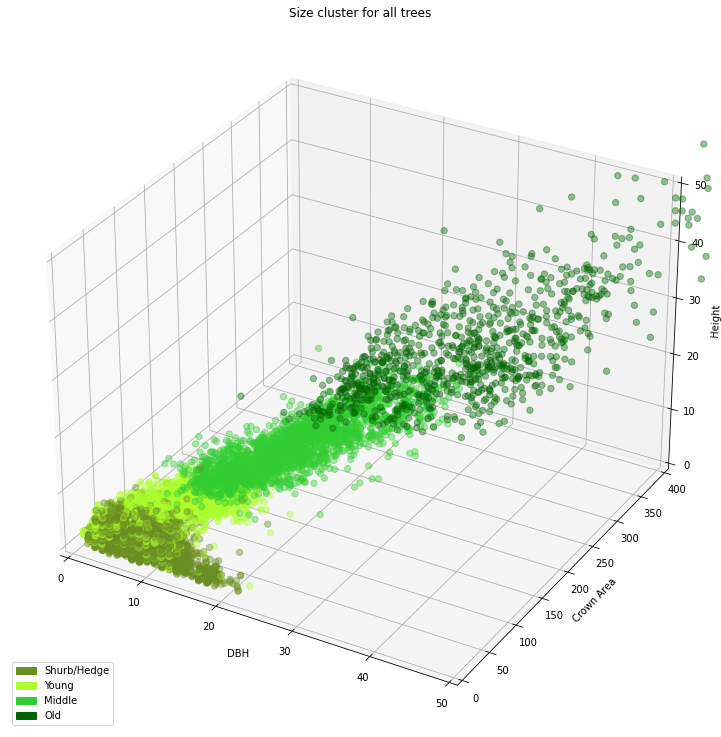

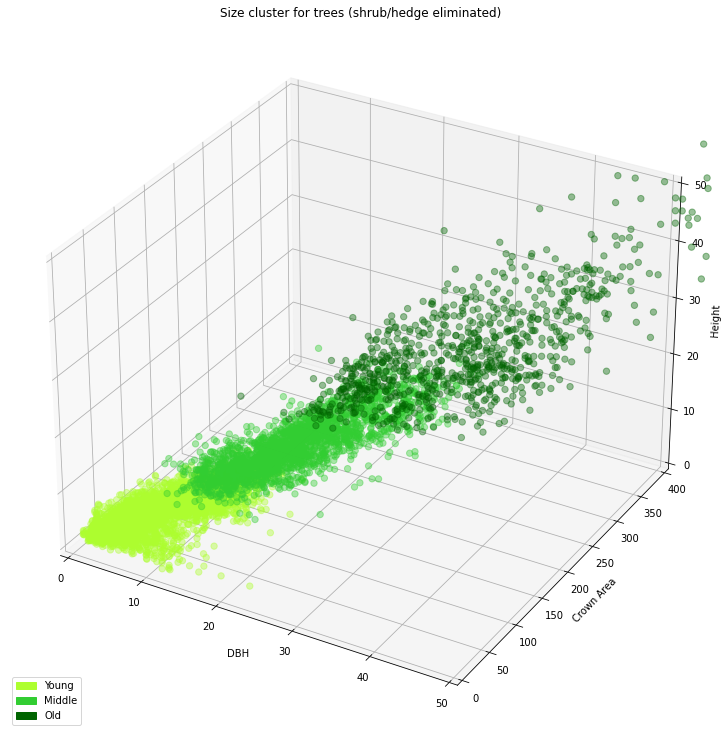

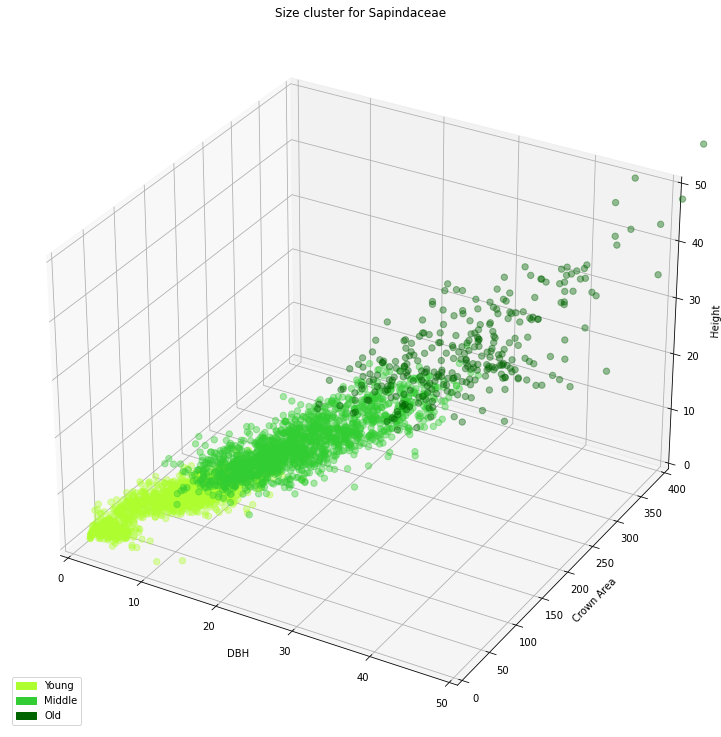

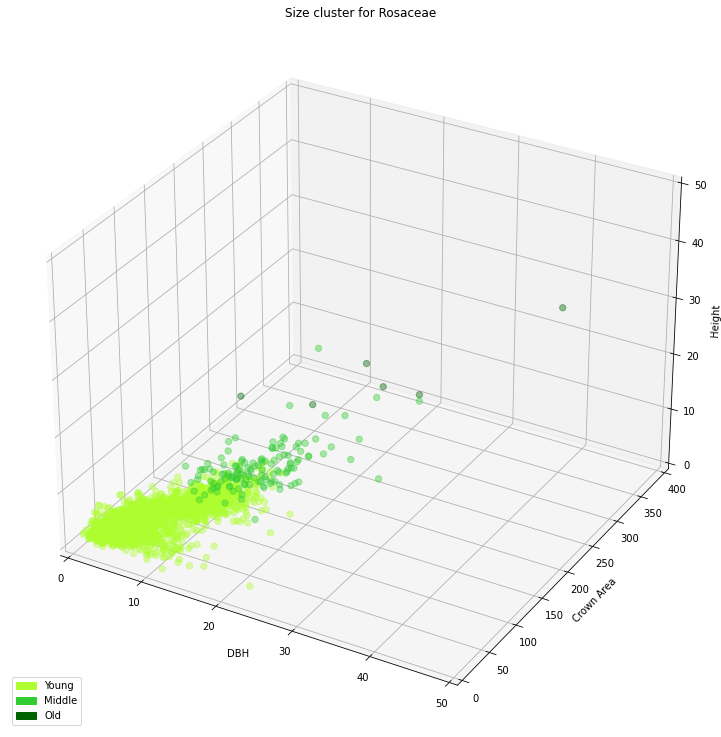

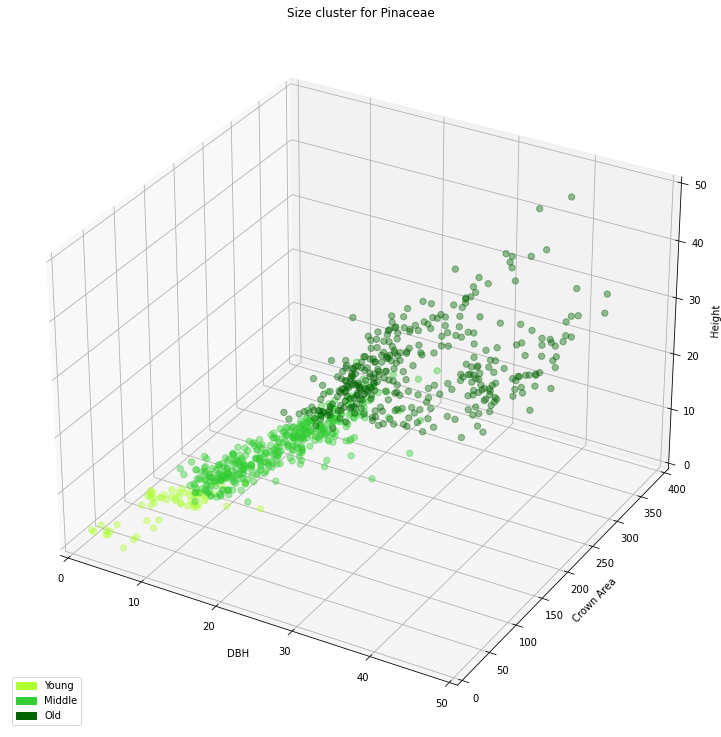

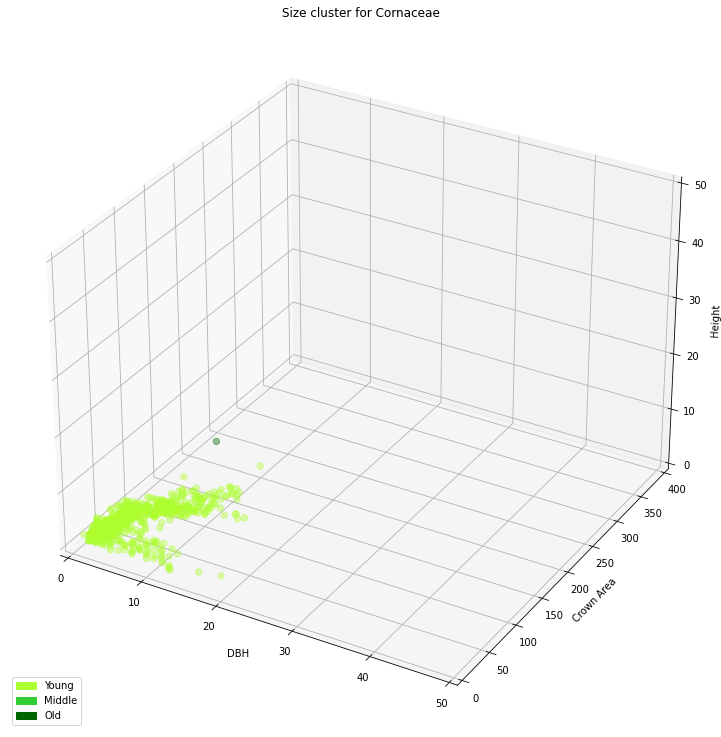

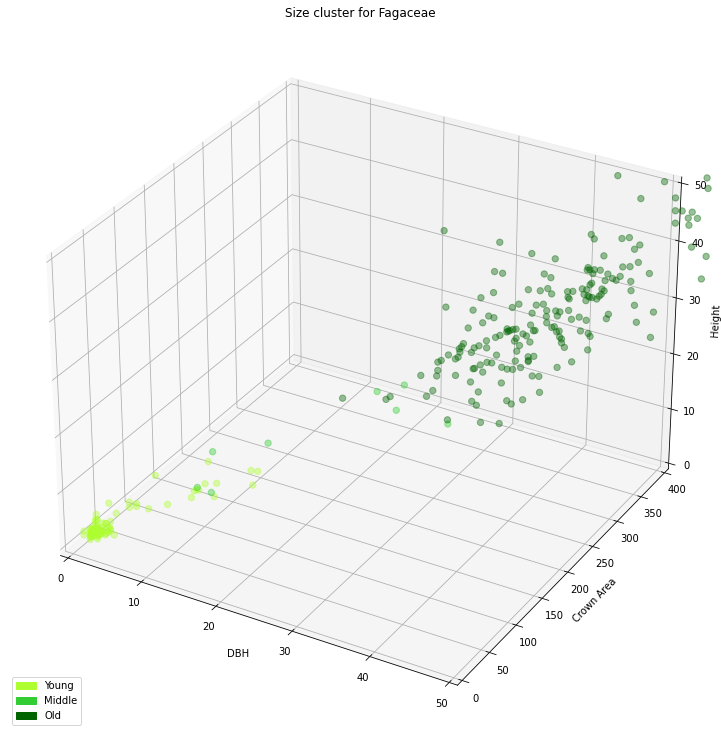

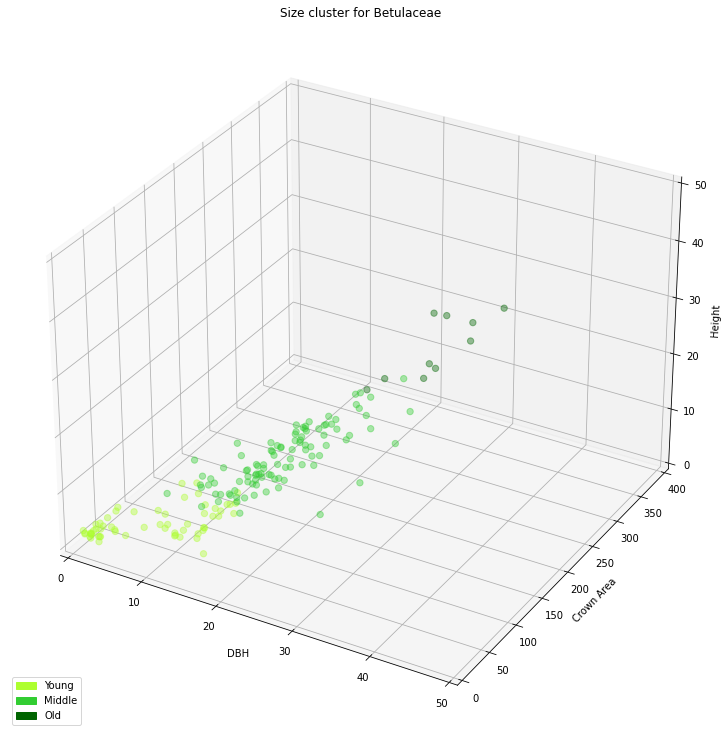

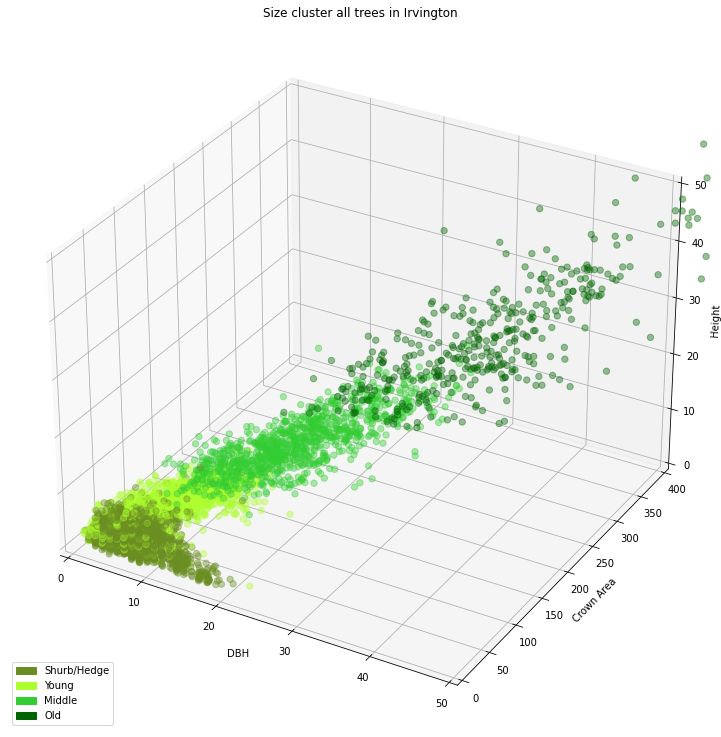

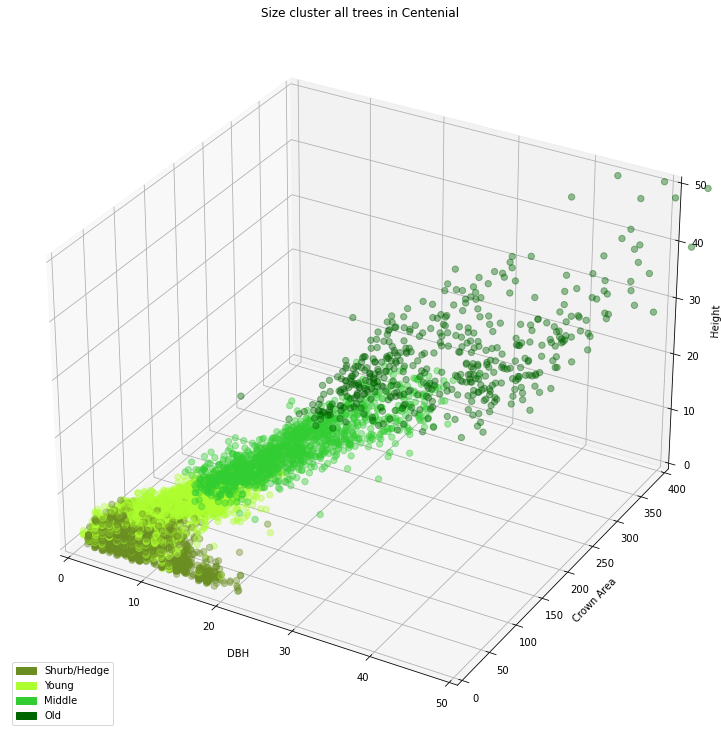

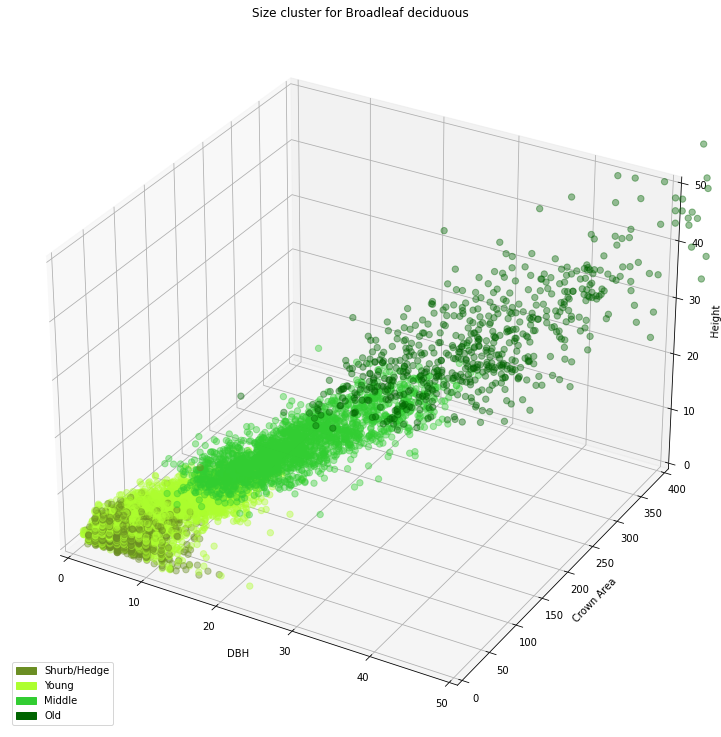

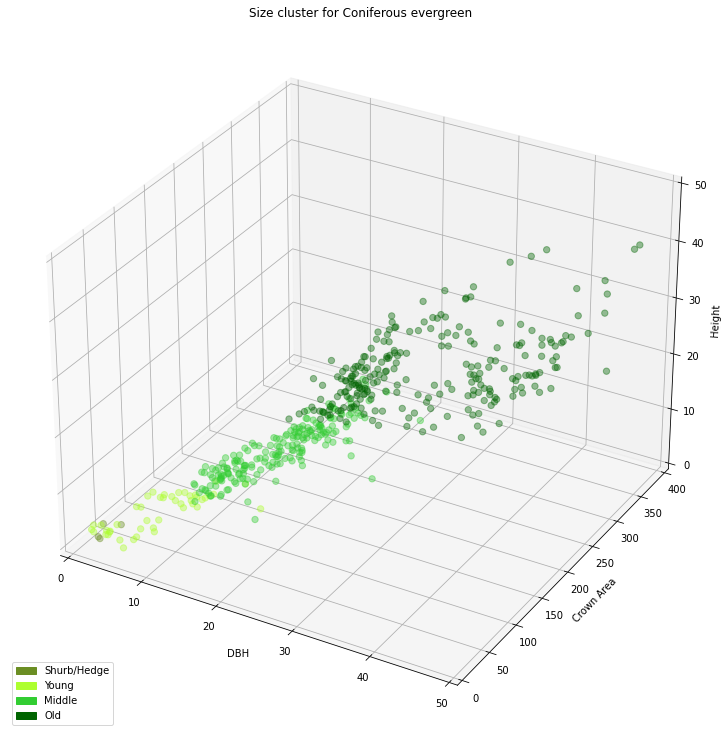

In [301]:
plot_clustered_data4(df, "Size cluster for all trees")
plot_clustered_data3(df.loc[df['Family'] != 'HEDGE'], "Size cluster for trees (shrub/hedge eliminated)")
plot_clustered_data3(df.loc[df['Family'] == 'Sapindaceae'], "Size cluster for Sapindaceae")
plot_clustered_data3(df.loc[df['Family'] == 'Rosaceae'], "Size cluster for Rosaceae")
plot_clustered_data3(df.loc[df['Family'] == 'Pinaceae'], "Size cluster for Pinaceae")
plot_clustered_data3(df.loc[df['Family'] == 'Cornaceae'], "Size cluster for Cornaceae")
plot_clustered_data3(df.loc[df['Family'] == 'Fagaceae'], "Size cluster for Fagaceae")
plot_clustered_data3(df.loc[df['Family'] == 'Betulaceae'], "Size cluster for Betulaceae")
plot_clustered_data4(df.loc[df['treeID'] < 20000], "Size cluster all trees in Irvington")
plot_clustered_data4(df.loc[df['treeID'] > 20000], "Size cluster all trees in Centenial")
plot_clustered_data4(df.loc[df['Functional'] == 'BD'], "Size cluster for Broadleaf deciduous")
plot_clustered_data4(df.loc[df['Functional'] == 'CE'], "Size cluster for Coniferous evergreen")

# E W Seperation and exporting

In [313]:
df

treeID     min_x      min_y     max_x      max_y    abv    all  min  \
0       10003 527030.45 5043911.64 527034.10 5043912.86     46    100 2.68   
5575    10004 527245.03 5043901.88 527259.66 5043916.21   8679  11003 1.37   
5576    10005 527344.70 5043902.50 527362.07 5043917.74   8936  10874 1.44   
5577    10006 527421.81 5043897.01 527442.54 5043917.74  12173  13477 1.38   
5578    10007 527151.76 5043901.58 527167.30 5043914.69   4660   5729 1.38   
...       ...       ...        ...       ...        ...    ...    ...  ...   
12907   27621 538367.08 5039095.60 538371.66 5039103.22    513    917 1.42   
12908   27623 538339.96 5039094.69 538346.36 5039100.17    308    862 1.48   
12909   27625 538308.26 5039093.77 538311.61 5039097.12    137    389 2.09   
12910   27627 538247.30 5039092.86 538252.48 5039096.21    322    654 1.47   
12911   27628 538277.47 5039093.16 538284.79 5039097.12    538   1068 1.37   

        max   avg    qav  std   ske   kur  hom  p10   p25   p50   p75   p90  \
0      2.91  2.87   8.23 0.04 -2.96 12.22 2.68 2.85  2.86  2.88  2.89  2.90   
5575  14.93  7.99  72.76 2.98 -0.23  2.19 1.37 3.69  5.82  8.25 10.30 11.78   
5576  16.93  8.16  78.78 3.48  0.25  2.26 1.44 3.47  5.50  8.00 10.26 13.43   
5577  20.67 14.60 230.76 4.20 -0.84  2.66 1.38 8.02 11.57 15.86 17.97 18.96   
5578  11.57  7.80  64.71 1.97 -0.93  3.61 1.38 5.22  6.57  8.28  9.28  9.92   
...     ...   ...    ...  ...   ...   ...  ...  ...   ...   ...   ...   ...   
12907 22.70  9.54 141.68 7.13  0.43  1.78 1.42 1.75  2.17  8.91 14.85 20.50   
12908 21.27  9.28 109.77 4.88  0.58  3.01 1.48 3.33  5.56  9.14 11.84 17.50   
12909 20.93  9.58 112.64 4.59  0.14  3.27 2.09 2.54  6.77 11.29 11.49 11.60   
12910 19.59  7.68  86.12 5.21  0.34  2.18 1.47 1.81  2.02  9.07 11.32 11.53   
12911 22.48 10.42 151.90 6.58  0.06  1.87 1.37 1.84  1.93 11.83 14.22 20.07   

       b10  b20  b30  b40  b50  b60  b70  b80  b90  d00  d01  d02  cov_gap  \
0     0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.46 0.00 0.00     0.52   
5575  0.04 0.15 0.22 0.33 0.49 0.65 0.81 0.94 0.99 0.14 0.22 0.42     0.17   
5576  0.05 0.20 0.28 0.46 0.61 0.78 0.84 0.93 0.98 0.19 0.22 0.39     0.15   
5577  0.01 0.02 0.07 0.15 0.24 0.30 0.40 0.60 0.87 0.01 0.07 0.28     0.02   
5578  0.02 0.04 0.06 0.11 0.24 0.38 0.55 0.81 0.98 0.06 0.29 0.45     0.15   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
12907 0.31 0.43 0.47 0.53 0.72 0.74 0.76 0.79 0.92 0.13 0.03 0.15     0.40   
12908 0.10 0.24 0.40 0.51 0.54 0.90 0.90 0.90 0.95 0.05 0.07 0.17     0.57   
12909 0.20 0.22 0.26 0.34 0.43 0.93 0.93 0.93 0.96 0.08 0.02 0.23     0.61   
12910 0.38 0.41 0.45 0.48 0.55 0.92 0.92 0.93 0.95 0.08 0.03 0.22     0.41   
12911 0.28 0.30 0.32 0.36 0.54 0.75 0.77 0.78 0.95 0.02 0.01 0.22     0.47   

       dns_gap  height  crownArea   SArea  Min_Slope  Max_Slope  Avg_Slope  \
0         0.54    2.41       2.60   15.54       0.45    5698.07     875.34   
5575      0.21   11.35     139.17 1273.63       0.00   10000.00    1671.15   
5576      0.18   14.41     168.25 1121.49       0.00   10000.00    1244.77   
5577      0.10   19.27     297.94 1331.66       0.14   10000.00    1511.67   
5578      0.19    9.69      97.46  700.19       0.00   10000.00    1402.57   
...        ...     ...        ...     ...        ...        ...        ...   
12907     0.44    7.66      13.56  246.34       0.07   10000.00    3906.60   
12908     0.64    5.93      16.17  277.07       0.12   10000.00    3781.20   
12909     0.65    4.13       6.22   91.12       0.20    8227.38    2632.09   
12910     0.51    6.09       9.94  190.38       0.00    6532.73    3023.02   
12911     0.50    7.77      15.14  334.22       0.00   10000.00    3937.76   

       Z_Mean_FirstReturn  2018_R  2018_G  2018_B  2018_N  2020_R  2020_G  \
0                    1.36   55.82   88.93   61.68  221.14  111.17  122.33   
5575                 6.61   61.62   79.08   64.92  202.11   56.24   89.45   
5576            

In [316]:
dfW = df.loc[df['treeID'] < 20000]
dfW['treeID'] = dfW['treeID']-10000
dfW =dfW[['treeID', 'Functional','Condition', 'Family','DBH','height','crownArea','Cluster']]
# Export the DataFrame to a CSV file
dfW.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/230318WestResults.csv', index=False)
dfW

<ipython-input-316-795812771244>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



treeID Functional Condition       Family   DBH  height  crownArea  \
0          3      HEDGE      Good        HEDGE  6.00    2.41       2.60   
5575       4         BD      Fair  Sapindaceae 16.00   11.35     139.17   
5576       5         BD      Fair  Sapindaceae 16.00   14.41     168.25   
5577       6         BD      Fair     Fagaceae 32.00   19.27     297.94   
5578       7         BD      Fair  Sapindaceae 15.00    9.69      97.46   
...      ...        ...       ...          ...   ...     ...        ...   
8516    5547         BD      Fair  Sapindaceae 18.00   13.14     123.84   
8517    5548         BD      Good     Rosaceae  8.00    8.08      22.20   
8518    5549         BD      Fair     Rosaceae  8.00    7.63      17.74   
8519    5551         BD      Fair     Rosaceae 12.00   10.03     110.55   
2524    5554      HEDGE      Good        HEDGE 11.00    9.85       2.51   

      Cluster  
0           0  
5575        2  
5576        2  
5577        3  
5578        2  
...       ...  
8516        2  
8517        1  
8518        1  
8519        2  
2524        0  

[5470 rows x 8 columns]

In [317]:
dfE = df.loc[df['treeID'] > 20000]
dfE['treeID'] = dfE['treeID']-20000
dfE =dfE[['treeID', 'Functional','Condition', 'Family','DBH','height','crownArea','Cluster']]
dfW.to_csv('/content/drive/MyDrive/XihanYAO_GISDataShare/230318EastResults.csv', index=False)
dfE

<ipython-input-317-601de7fdc858>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



treeID Functional Condition      Family   DBH  height  crownArea  \
8520        6         BD      Fair    Rosaceae 11.00    6.73      50.73   
8521        7         BD      Good    Rosaceae  4.00    3.61       3.25   
8522        8         BD      Good   Cornaceae 13.00    4.72       7.71   
8523        9         BD      Poor    Rosaceae  3.00    3.56       9.85   
8524       10         BD      Fair    Rosaceae  3.00    3.37      10.68   
...       ...        ...       ...         ...   ...     ...        ...   
12907    7621         BD      Good  Betulaceae 11.00    7.66      13.56   
12908    7623         BD      Good    Rosaceae 13.00    5.93      16.17   
12909    7625         BD      Good    Rosaceae 12.00    4.13       6.22   
12910    7627         BD      Good    Rosaceae 11.00    6.09       9.94   
12911    7628         BD      Good  Betulaceae 14.00    7.77      15.14   

       Cluster  
8520         1  
8521         1  
8522         1  
8523         1  
8524         1  
...        ...  
12907        1  
12908        1  
12909        1  
12910        1  
12911        1  

[7442 rows x 8 columns]